In [2]:
import emoji
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from keras.utils import np_utils  

Using TensorFlow backend.


In [3]:
emoji.EMOJI_UNICODE

{':1st_place_medal:': '🥇',
 ':2nd_place_medal:': '🥈',
 ':3rd_place_medal:': '🥉',
 ':AB_button_(blood_type):': '🆎',
 ':ATM_sign:': '🏧',
 ':A_button_(blood_type):': '🅰',
 ':Afghanistan:': '🇦🇫',
 ':Albania:': '🇦🇱',
 ':Algeria:': '🇩🇿',
 ':American_Samoa:': '🇦🇸',
 ':Andorra:': '🇦🇩',
 ':Angola:': '🇦🇴',
 ':Anguilla:': '🇦🇮',
 ':Antarctica:': '🇦🇶',
 ':Antigua_&_Barbuda:': '🇦🇬',
 ':Aquarius:': '♒',
 ':Argentina:': '🇦🇷',
 ':Aries:': '♈',
 ':Armenia:': '🇦🇲',
 ':Aruba:': '🇦🇼',
 ':Ascension_Island:': '🇦🇨',
 ':Australia:': '🇦🇺',
 ':Austria:': '🇦🇹',
 ':Azerbaijan:': '🇦🇿',
 ':BACK_arrow:': '🔙',
 ':B_button_(blood_type):': '🅱',
 ':Bahamas:': '🇧🇸',
 ':Bahrain:': '🇧🇭',
 ':Bangladesh:': '🇧🇩',
 ':Barbados:': '🇧🇧',
 ':Belarus:': '🇧🇾',
 ':Belgium:': '🇧🇪',
 ':Belize:': '🇧🇿',
 ':Benin:': '🇧🇯',
 ':Bermuda:': '🇧🇲',
 ':Bhutan:': '🇧🇹',
 ':Bolivia:': '🇧🇴',
 ':Bosnia_&_Herzegovina:': '🇧🇦',
 ':Botswana:': '🇧🇼',
 ':Bouvet_Island:': '🇧🇻',
 ':Brazil:': '🇧🇷',
 ':British_Indian_Ocean_Territory:': '🇮🇴',
 ':British_Virgin_Is

In [4]:
df_train=pd.read_csv("train_emoji.csv",header=None)
df_test=pd.read_csv("test_emoji.csv",header=None)

df_test.head()

,0,1
0,I want to eat\t,4
1,he did not answer\t,3
2,he got a raise\t,2
3,she got me a present\t,0
4,ha ha ha it was so funny\t,2


In [5]:
train=df_train.values[:,:2]
test=df_test.values

x_train,y_train=train[:,0],train[:,1]
x_test,y_test=test[:,0],test[:,1]

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((132,), (56,), (132,), (56,))

In [6]:
emoji_dict={"0":":black_heart:",
            "1":":baseball:",
            "2":":grinning_face_with_big_eyes:",
            "3":":disappointed_face:",
            "4":":fork_and_knife:"}

In [7]:
for i in range(x_train.shape[0]):
    
    print(x_train[i],emoji.emojize(emoji_dict[str(y_train[i])]))

never talk to me again 😞
I am proud of your achievements 😃
It is the worst day in my life 😞
Miss you so much 🖤
food is life 🍴
I love you mum 🖤
Stop saying bullshit 😞
congratulations on your acceptance 😃
The assignment is too long  😞
I want to go play ⚾
she did not answer my text  😞
Your stupidity has no limit 😞
how many points did he score ⚾
my algorithm performs poorly 😞
I got approved 😃
Stop shouting at me 😞
Sounds like a fun plan ha ha 😃
no one likes him 😞
the game just finished ⚾
I will celebrate soon 😃
So sad you are not coming 😞
She is my dearest love 🖤
Good job 😃
It was funny lol 😃
candy is life  😃
The chicago cubs won again ⚾
I am hungry 🍴
I am so excited to see you after so long 😃
you did well on you exam 😃
lets brunch some day 🍴
he is so cute 🖤
How dare you ask that 😞
do you want to join me for dinner  🍴
I said yes 😃
she is attractive 🖤
you suck 😞
she smiles a lot 😃
he is laughing 😃
she takes forever to get ready  😞
French macaroon is so tasty 🍴
we made it 😃
I am excited 😃
I 

#### One hot encoding y:

In [8]:
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

y_train.shape,y_test.shape

((132, 5), (56, 5))

In [9]:
emb={}

with open("glove.6B.50d.txt","r",encoding="utf8") as f:
    text=f.read()
    
for line in tqdm_notebook(text.split('\n')):
    
    if line=="":
        break
        
    data=line.split(" ")
    word=data[0]
    embedding=data[1:]
    emb[word]=[float(e) for e in embedding]

In [10]:
print(emb["tiger"])                               #sample embedding

[0.33183, -0.60256, -0.046032, 0.89941, 0.26504, -0.02695, -0.89378, -0.21996, 0.28162, -0.7974, -0.15519, -0.15385, -0.4443, -0.060597, 0.17669, 0.49661, 1.0924, 0.6526, -1.4514, 0.5046, -1.4857, 0.60573, 0.51944, -0.39546, 0.2653, -1.0493, -0.79394, -0.0085854, -0.2987, -0.41866, 2.0018, -0.078285, -0.72413, 1.3828, 0.5019, 0.35222, -0.37933, -0.81655, -0.59159, -1.0502, -0.55532, -0.46533, -0.3038, 0.11061, 1.3216, -0.34734, 0.039552, 0.046421, -0.086983, -0.45584]


### Now we will embed each word in the training data and pass this embedded data to the LSTM model:

###### Defining the shape of the embedded output:

In [11]:
maxlen=10                            
#each sentence will be of 10 words max, shorter sentences will be padded, longer ones will be clipped

emb_size=50
#glove embeddings use 50 length vectors for each word

In [12]:
def embed(data):
    emb_out=[]

    for xi in data:

        xi=xi.split(" ")                

        cur_out=[]                                  #will store embedding for each word in the current sentence
        for word in xi:
            word=word.lower()

            if emb.get(word) is None:
                continue

            embedding=np.array(emb[word])       
            cur_out.append(embedding)               #embedding for current word appended to cur_out
            
        if len(cur_out)>maxlen:                     #clip the cur_out from end if sentence size is greater than maxlen
            cur_out=cur_out[:maxlen]
            
        if len(cur_out)<maxlen:                     #pad cur_out with np arrays containing 0s if cur_out is smaller than maxlen
            while len(cur_out)<maxlen:
                cur_out.append(np.zeros(emb_size))       

        emb_out.append(np.array(cur_out))

    emb_out=np.array(emb_out)
    return emb_out

In [13]:
x_train_emb=embed(x_train)
x_test_emb=embed(x_test)

x_train_emb.shape,x_test_emb.shape

((132, 10, 50), (56, 10, 50))

# Creating the LSTM model:

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [15]:
model=Sequential()

model.add(LSTM(64,input_shape=(maxlen,emb_size),return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64,input_shape=(maxlen,emb_size)))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1],activation="softmax"))

W0411 09:55:43.198088  4344 deprecation.py:506] From c:\users\akshay\anaconda3\envs\tf\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 64)            29440     
_________________________________________________________________
dropout (Dropout)            (None, 10, 64)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 5)                 325       
Total params: 62,789
Trainable params: 62,789
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

check=ModelCheckpoint("model.h5",monitor="val_loss",verbose=1,save_best_only=True)
stop=EarlyStopping(monitor="val_loss",patience=40,verbose=1)

In [18]:
hist=model.fit(x_train_emb,y_train,validation_split=0.1,callbacks=[check],batch_size=32,epochs=100,shuffle=True)

Train on 118 samples, validate on 14 samples


W0411 09:55:49.934650  4344 deprecation.py:323] From c:\users\akshay\anaconda3\envs\tf\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
 32/118 [=======>......................] - ETA: 3s - loss: 1.6184 - acc: 0.0938
Epoch 00001: val_loss improved from inf to 1.58776, saving model to model.h5
118/118 [==============================] - 2s 17ms/sample - loss: 1.6023 - acc: 0.2119 - val_loss: 1.5878 - val_acc: 0.2857
Epoch 2/100
 96/118 [=======================>......] - ETA: 0s - loss: 1.5709 - acc: 0.250 - ETA: 0s - loss: 1.5586 - acc: 0.2708
Epoch 00002: val_loss did not improve from 1.58776
118/118 [==============================] - 0s 980us/sample - loss: 1.5556 - acc: 0.2966 - val_loss: 1.6013 - val_acc: 0.2857
Epoch 3/100
 32/118 [=======>......................] - ETA: 0s - loss: 1.5347 - acc: 0.4062
Epoch 00003: val_loss did not improve from 1.58776
118/118 [==============================] - 0s 803us/sample - loss: 1.5014 - acc: 0.3898 - val_loss: 1.6056 - val_acc: 0.2857
Epoch 4/100
 32/118 [=======>......................] - ETA: 0s - loss: 1.4635 - acc: 0.4375
Epoch 00004: val_loss did not improve fro

Epoch 30/100
 32/118 [=======>......................] - ETA: 0s - loss: 0.2165 - acc: 0.9375
Epoch 00030: val_loss did not improve from 0.72124
118/118 [==============================] - 0s 803us/sample - loss: 0.3025 - acc: 0.9322 - val_loss: 0.7853 - val_acc: 0.6429
Epoch 31/100
 96/118 [=======================>......] - ETA: 0s - loss: 0.1098 - acc: 0.968 - ETA: 0s - loss: 0.1399 - acc: 0.9583
Epoch 00031: val_loss did not improve from 0.72124
118/118 [==============================] - 0s 1ms/sample - loss: 0.1522 - acc: 0.9492 - val_loss: 1.5102 - val_acc: 0.5714
Epoch 32/100
 32/118 [=======>......................] - ETA: 0s - loss: 0.1158 - acc: 0.9375
Epoch 00032: val_loss did not improve from 0.72124
118/118 [==============================] - 0s 828us/sample - loss: 0.2175 - acc: 0.9153 - val_loss: 1.0981 - val_acc: 0.7143
Epoch 33/100
 32/118 [=======>......................] - ETA: 0s - loss: 0.0710 - acc: 1.0000
Epoch 00033: val_loss did not improve from 0.72124
118/118 [====

 32/118 [=======>......................] - ETA: 0s - loss: 0.0403 - acc: 1.0000
Epoch 00060: val_loss did not improve from 0.63683
118/118 [==============================] - 0s 558us/sample - loss: 0.0430 - acc: 0.9915 - val_loss: 1.6804 - val_acc: 0.5714
Epoch 61/100
 32/118 [=======>......................] - ETA: 0s - loss: 0.0999 - acc: 0.9688
Epoch 00061: val_loss did not improve from 0.63683
118/118 [==============================] - 0s 583us/sample - loss: 0.0505 - acc: 0.9831 - val_loss: 1.6401 - val_acc: 0.5714
Epoch 62/100
 32/118 [=======>......................] - ETA: 0s - loss: 0.0415 - acc: 1.0000
Epoch 00062: val_loss did not improve from 0.63683
118/118 [==============================] - 0s 583us/sample - loss: 0.0662 - acc: 0.9746 - val_loss: 1.5630 - val_acc: 0.5714
Epoch 63/100
 32/118 [=======>......................] - ETA: 0s - loss: 0.0165 - acc: 1.0000
Epoch 00063: val_loss did not improve from 0.63683
118/118 [==============================] - 0s 862us/sample - l

 32/118 [=======>......................] - ETA: 0s - loss: 0.0038 - acc: 1.0000
Epoch 00090: val_loss did not improve from 0.63683
118/118 [==============================] - 0s 828us/sample - loss: 0.0058 - acc: 1.0000 - val_loss: 1.4658 - val_acc: 0.6429
Epoch 91/100
 32/118 [=======>......................] - ETA: 0s - loss: 0.0036 - acc: 1.0000
Epoch 00091: val_loss did not improve from 0.63683
118/118 [==============================] - 0s 718us/sample - loss: 0.0068 - acc: 1.0000 - val_loss: 1.4982 - val_acc: 0.6429
Epoch 92/100
 96/118 [=======================>......] - ETA: 0s - loss: 0.0022 - acc: 1.000 - ETA: 0s - loss: 0.0038 - acc: 1.0000
Epoch 00092: val_loss did not improve from 0.63683
118/118 [==============================] - 0s 1ms/sample - loss: 0.0044 - acc: 1.0000 - val_loss: 1.5129 - val_acc: 0.6429
Epoch 93/100
 96/118 [=======================>......] - ETA: 0s - loss: 0.0042 - acc: 1.000 - ETA: 0s - loss: 0.0039 - acc: 1.0000
Epoch 00093: val_loss did not improve f

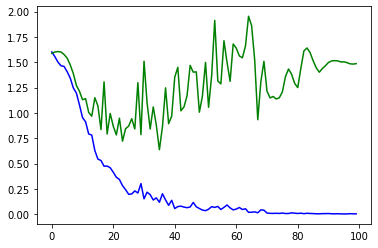

In [19]:
plt.plot(hist.history["loss"],c="b")
plt.plot(hist.history["val_loss"],c="g")

plt.show()

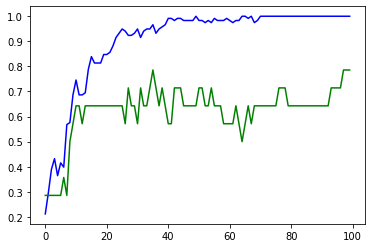

In [22]:
plt.plot(hist.history["acc"],c="b")
plt.plot(hist.history["val_acc"],c="g")

plt.show()

In [23]:
from tensorflow.keras.models import load_model 
model=load_model("model.h5")

W0411 09:56:49.812927  4344 deprecation.py:506] From c:\users\akshay\anaconda3\envs\tf\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0411 09:56:49.815884  4344 deprecation.py:506] From c:\users\akshay\anaconda3\envs\tf\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Orthogonal.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0411 09:56:49.817914  4344 deprecation.py:506] From c:\users\akshay\anaconda3\envs\tf\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dt

In [24]:
model.evaluate(x_test_emb,y_test)

56/56 [==============================] - ETA: 0s - loss: 2.2281 - acc: 0.500 - 0s 5ms/sample - loss: 2.1374 - acc: 0.4821


[2.1373776367732455, 0.48214287]

# Save and Load Model architecture in JSON

In [25]:
model_json=model.to_json()                               #saves the model architecture in json format

with open("model.json",'w') as f:
    f.write(model_json)                                  #writing the model architecture stored in json to a .json file

In [27]:
from tensorflow.keras.models import model_from_json

with open("model.json",'r') as f:
    model=model_from_json(f.read())
    
model.load_weights("model.h5")

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 64)            29440     
_________________________________________________________________
dropout (Dropout)            (None, 10, 64)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 5)                 325       
Total params: 62,789
Trainable params: 62,789
Non-trainable params: 0
_________________________________________________________________
